In [ ]:
#!/usr/bin/env python3
"""
Minimal test script to verify the water rocket simulation works.
"""

import sys
import os

from waterrocketpy.core.simulation import WaterRocketSimulator
from waterrocketpy.rocket.builder import RocketBuilder,create_standard_rocket

print("✓ All imports successful")

# Create a simple rocket
print("\n1. Creating standard rocket...")
rocket = create_standard_rocket()

print(f"   Rocket created: {rocket.name}")
print(f"   Total mass: {rocket.total_mass:.3f} kg")

# Convert to simulation parameters
print("\n2. Converting to simulation parameters...")
builder = RocketBuilder.from_dict(rocket.__dict__)
sim_params = builder.to_simulation_params()
print(f"   Parameters ready: {len(sim_params)} parameters")

# Run simulation
print("\n3. Running simulation...")
simulator = WaterRocketSimulator()

# Short simulation for testing
sim_settings = {"max_time": 100.0, "time_step": 0.01, "solver": "RK45"}

flight_data = simulator.simulate(sim_params, sim_settings)


print(f"   ✓ Simulation completed successfully!")
print(f"   Maximum altitude: {flight_data.max_altitude:.2f} m")
print(f"   Maximum velocity: {flight_data.max_velocity:.2f} m/s")
print(f"   Flight time: {flight_data.flight_time:.2f} s")
print(f"   Data points: {len(flight_data.time)}")

print("\n✓ Your simulation is working correctly.")

✓ All imports successful

1. Creating standard rocket...
   Rocket created: Standard 2L Rocket
   Total mass: 0.910 kg

2. Converting to simulation parameters...
   Parameters ready: 9 parameters

3. Running simulation...
Starting water expulsion phase...
Water depleted at t=0.123s, starting air expulsion phase...
Air depleted at t=0.199s, starting coasting phase...
   ✓ Simulation completed successfully!
   Maximum altitude: 61.45 m
   Maximum velocity: 44.60 m/s
   Flight time: 7.19 s
   Data points: 752

✓ All tests passed! Your simulation is working correctly.



4. Performing energy breakdown analysis...

5. Creating energy breakdown plots...


C:\Users\Arri\Documents\Pablo\PythonProgramming\SCE\waterrocketpy\waterrocketpy\analysis\energy_breakdown_plot.py:252: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


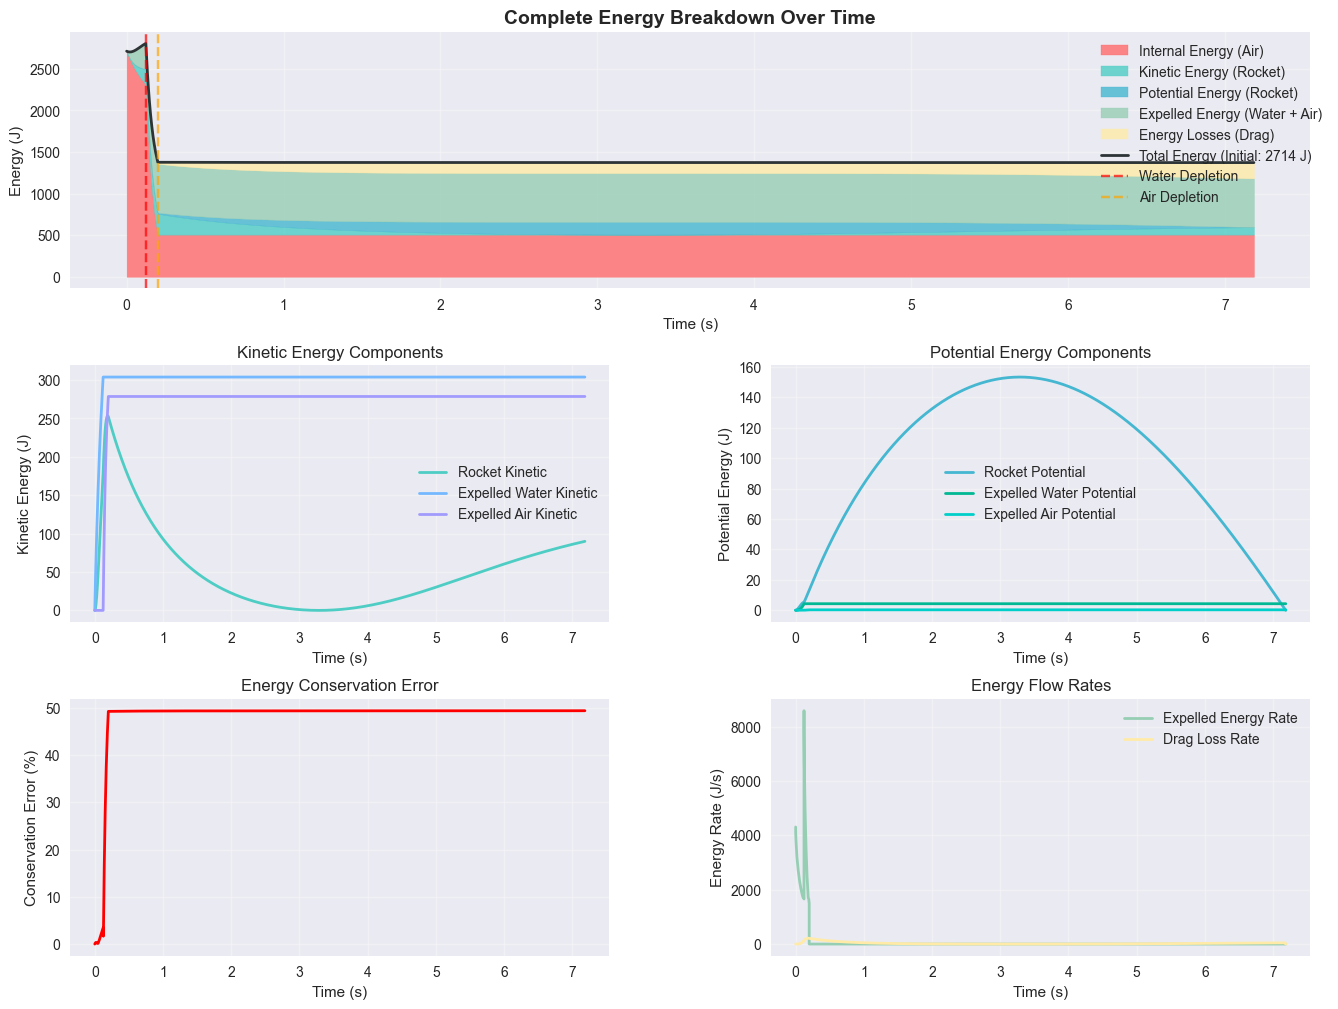

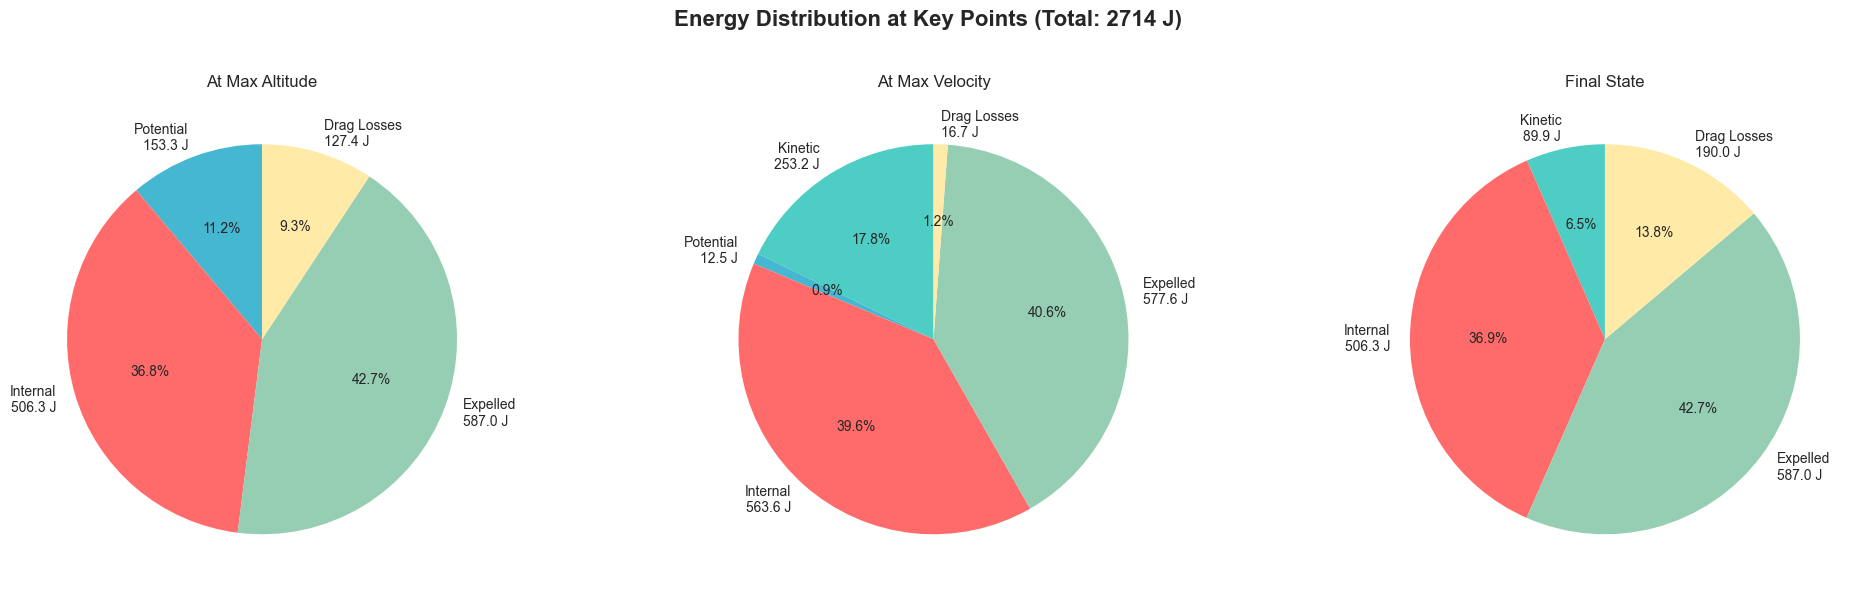

In [18]:
from waterrocketpy.analysis.energy_breakdown import tenergy_breakdown
from waterrocketpy.analysis.energy_breakdown_plot import create_energy_plots, create_energy_summary_chart

print("\n4. Performing energy breakdown analysis...")
energy_components = tenergy_breakdown(flight_data, sim_params)

# Create comprehensive energy plots
print("\n5. Creating energy breakdown plots...")
create_energy_plots(energy_components, flight_data)
create_energy_summary_chart(energy_components, flight_data)

C:\Users\Arri\Documents\Pablo\PythonProgramming\SCE\waterrocketpy\waterrocketpy\visualization\flight_animation.py:92: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Arri\Documents\Pablo\PythonProgramming\SCE\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


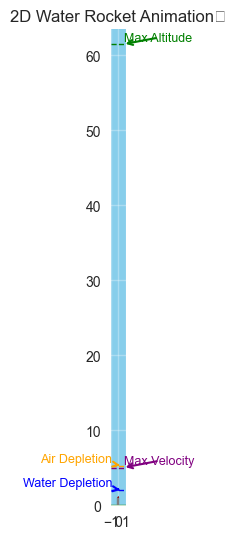

In [19]:
from waterrocketpy.visualization.flight_animation import animate_flight
animate_flight(flight_data)

1. Analyzing flight phases...

WATER ROCKET FLIGHT ANALYSIS SUMMARY

Flight Performance:
------------------
  Maximum Altitude         : 61.45 m
  Maximum Velocity         : 44.60 m/s
  Total Flight Time        : 7.19 s
  Time to Apogee           : 3.29 s

Phase Durations:
---------------
  Water Phase              : 0.12 s
  Air Phase                : 0.08 s
  Coasting Phase           : 6.99 s

Initial Conditions:
------------------
  Initial Water Mass       : 660.0 g
  Initial Air Mass         : 12.6 g
  Initial Pressure         : 8.11 bar
  Initial Temperature      : 300.0 K

2. Generating plots...
   - Trajectory and velocity plots...
   - Forces and acceleration plots...
   - Propellant and pressure plots...
   - Exhaust properties plots...
   - Air exit conditions plots...


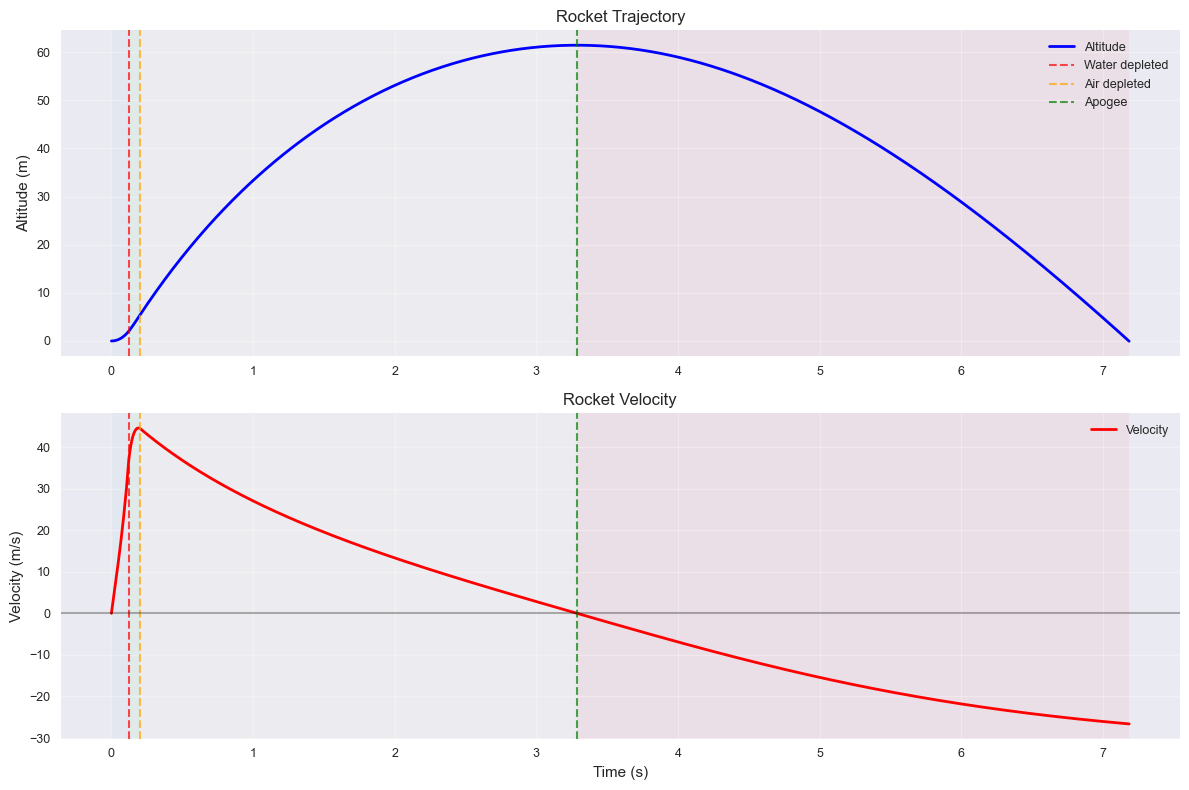

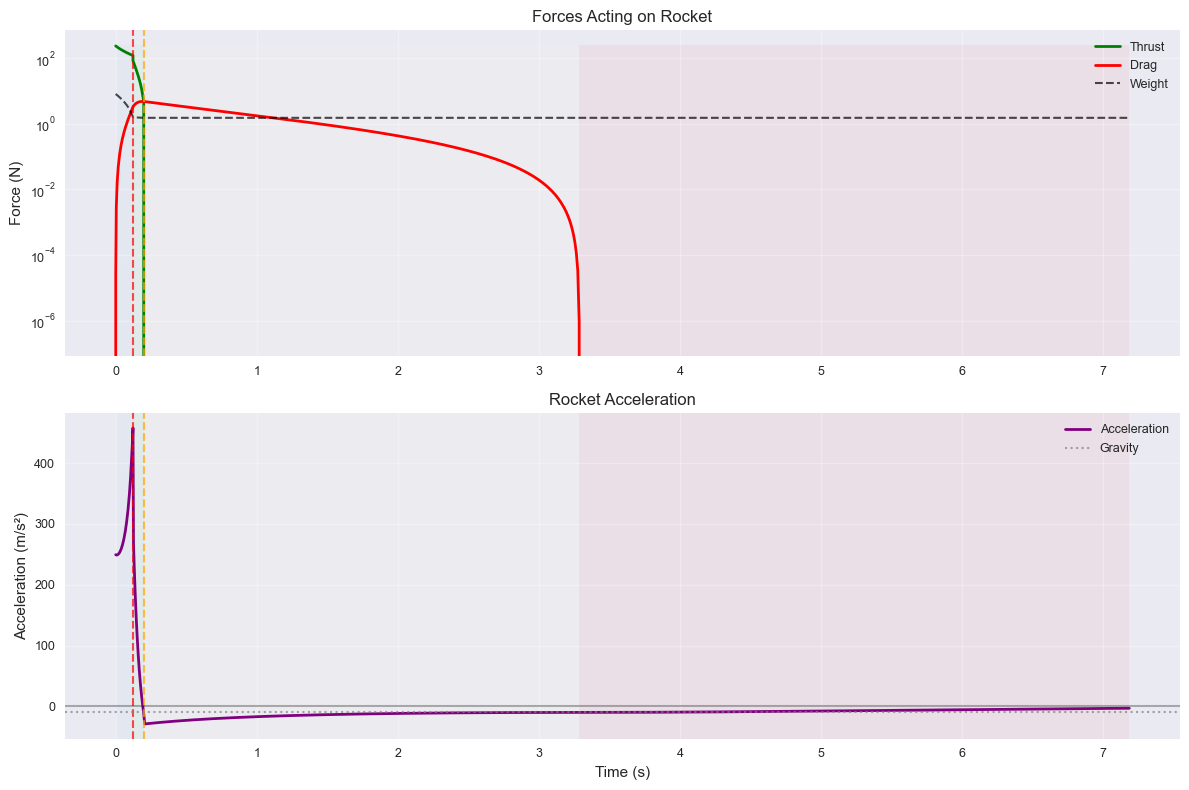

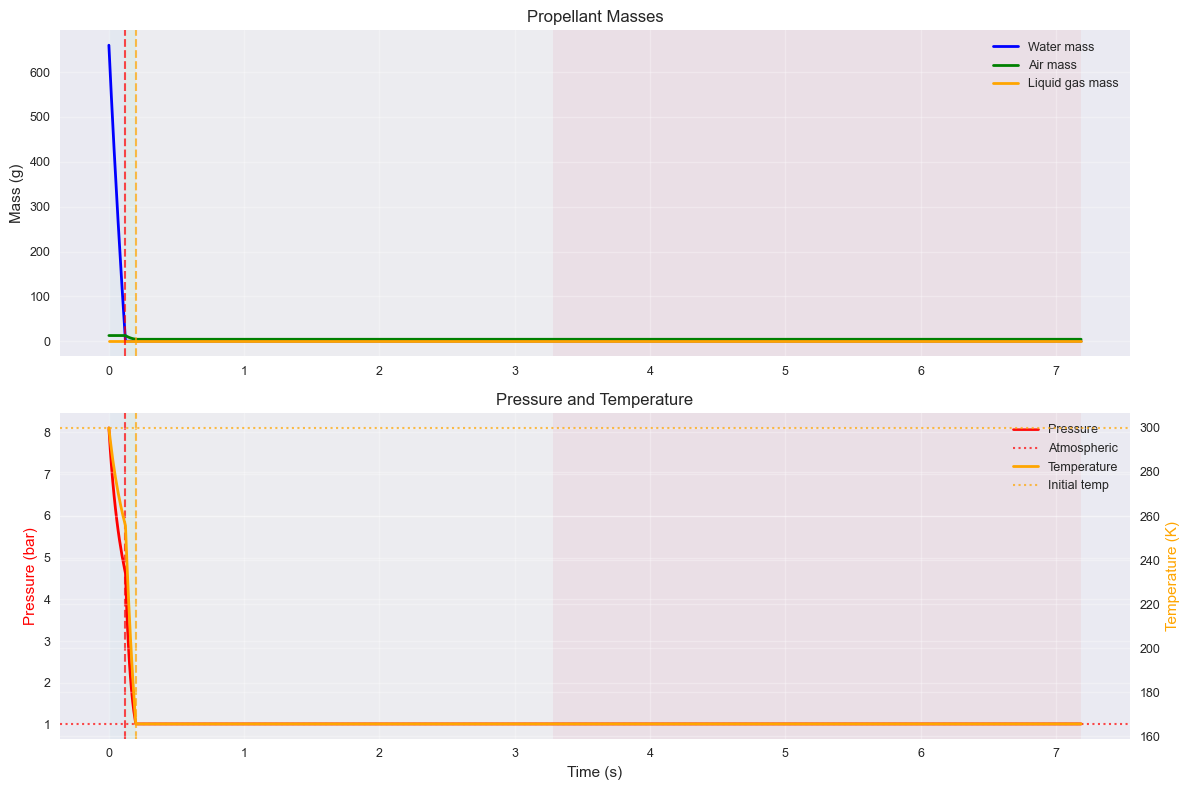

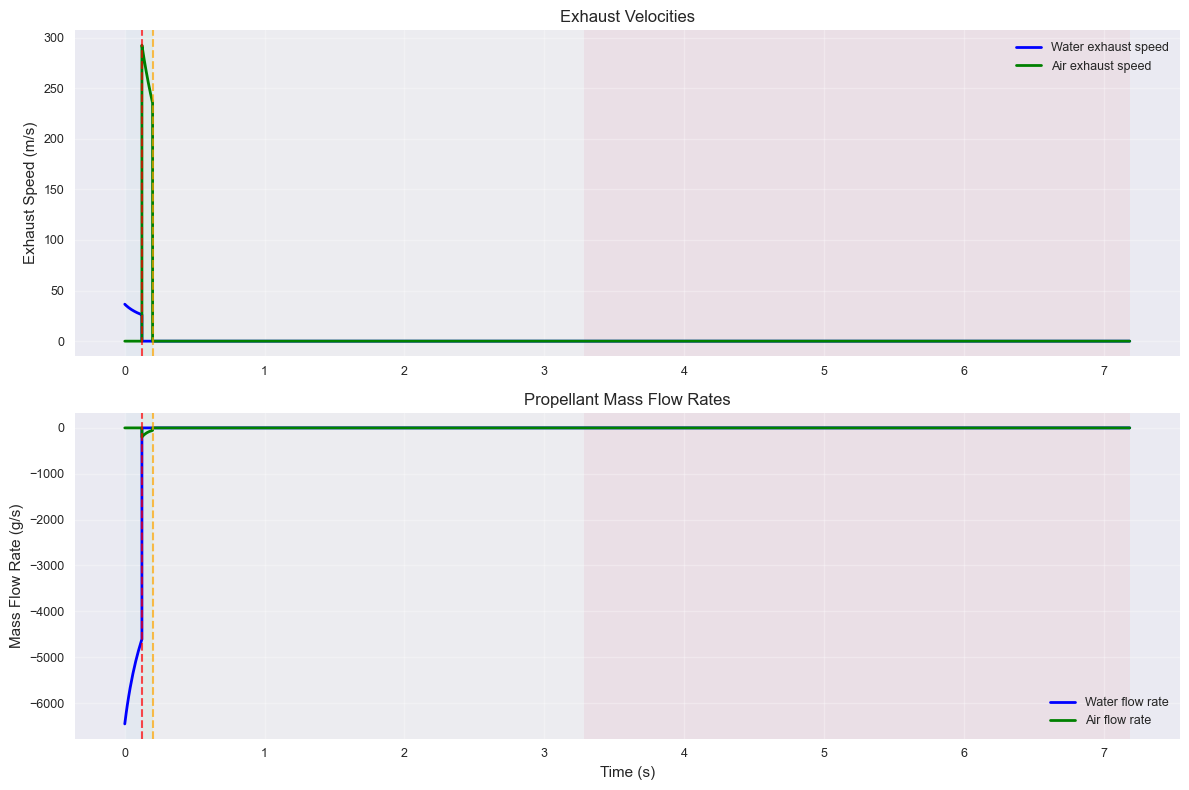

In [21]:
import matplotlib.pyplot as plt

from waterrocketpy.core.simulation import WaterRocketSimulator
from waterrocketpy.rocket.builder import RocketBuilder, create_standard_rocket
from waterrocketpy.core.constants import ATMOSPHERIC_PRESSURE, INITIAL_TEMPERATURE
from waterrocketpy.visualization.plot_flight_data import (
    setup_plot_style,
    identify_flight_phases,
    plot_trajectory_and_velocity,
    plot_forces_and_acceleration,
    plot_propellant_and_pressure,
    plot_exhaust_properties,
    plot_air_exit_conditions,
    print_flight_summary)

# Setup plotting style
setup_plot_style()
# Identify flight phases
print("1. Analyzing flight phases...")
phases = identify_flight_phases(flight_data) 
# Print summary
print_flight_summary(flight_data, phases)

# Create all plots
print("2. Generating plots...")
figs = []
print("   - Trajectory and velocity plots...")
figs.append(plot_trajectory_and_velocity(flight_data, phases))
print("   - Forces and acceleration plots...")
figs.append(plot_forces_and_acceleration(flight_data, phases))
print("   - Propellant and pressure plots...")
figs.append(plot_propellant_and_pressure(flight_data, phases))
print("   - Exhaust properties plots...")
figs.append(plot_exhaust_properties(flight_data, phases))
print("   - Air exit conditions plots...")
figs.append(plot_air_exit_conditions(flight_data, phases))
# Show all plots
plt.show()
